<a href="https://colab.research.google.com/github/stuart-lane/MachineLearning/blob/main/Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sp

# INTRODUCTION

In this notebook, we are going to look at different methods of evaluating the partial derivatives of the two-dimensional function

$$
f(x_1, x_2) = x_1e^{x_1} + x_1x_2 - \sin(x_2).
$$

w.r.t. $ x_1 $ and $ x_2 $ at the point $ (x_1, x_2) = (2, 5)$.

### MANUAL DIFFERENTIATION

For manual differentation, we calculate the closed-form expression of the derivative. Via the product rule and the chain rule, the first derivative of $ f(x_1, x_2) $ w.r.t. $ x_1 $ is given by

$$
f'_{x_1}(x_1, x_2) = e^{x_1} + x_1 e^{x_1} + x_2,
$$
$$
f'_{x_2}(x_1, x_2) = x_1 - cos(x_2).
$$

It therefore follows that

$$
f'_{x_1}(2, 5) = e^{2} + 2 e^{2} + 5 = 3e^2 + 5 = 27.167,
$$
$$
f'_{x_2}(2, 5) = 2 - cos(5) = 1.716.
$$

In [55]:
# Define the function f(x1, x2)
def fun(x_1, x_2):
  f = x_1 * np.exp(x_1) + x_1 * x_2 - np.sin(x_2)
  return f

# Define the partial derivatives of f with respect to x1 and x2
def derivative_x1(x_1, x_2):
  fx1 = np.exp(x_1) + x_1 * np.exp(x_1) + x_2
  return fx1

def derivative_x2(x_1, x_2):
  fx2 = x_1 - np.cos(x_2)
  return fx2

# Evaluate the derivatives at the point (x1, x2) = (2, 5)
x_1, x_2 = 2, 5
deriv_man_x1_val = derivative_x1(x_1, x_2)
deriv_man_x2_val = derivative_x2(x_1, x_2)

print(f"The value of the derivative of f(x1, x2) with respect to x1 at (2, 5) is approximately: {deriv_man_x1_val}")
print(f"The value of the derivative of f(x1, x2) with respect to x2 at (2, 5) is approximately: {deriv_man_x2_val}")

The value of the derivative of f(x1, x2) with respect to x1 at (2, 5) is approximately: 27.16716829679195
The value of the derivative of f(x1, x2) with respect to x2 at (2, 5) is approximately: 1.7163378145367738
25.73703647252444


### SYMBOLIC DIFFERENTIATION

Symbolic differentiation requires software to manipulate mathematical expressions to obtain a general symbolic derivative, which can then be evaluated at given inputs. This method has the advantage of being able to given expressions evaluable at any given input point, but this method requires the function of interest to have a closed-form expression.

In [12]:
# Define the symbols
x1, x2 = sp.symbols('x1 x2')

# Define the function f(x1, x2)
f = x1 * sp.exp(x1) + x1 * x2 - sp.sin(x2)

# Compute the partial derivatives of f with respect to x1 and x2
f_x1 = sp.diff(f, x1)
f_x2 = sp.diff(f, x2)

# Evaluate the derivatives at the point (x1, x2) = (2, 5)
point = {x1: 2, x2: 5}
deriv_symb_x1 = f_x1.subs(point)
deriv_symb_x2 = f_x2.subs(point)
deriv_symb_x1_val = f_x1.subs(point).evalf()
deriv_symb_x2_val = f_x2.subs(point).evalf()

print(f"The derivative of f(x1, x2) with respect to x1 at (2, 5) is: {deriv_symb_x1}")
print(f"The derivative of f(x1, x2) with respect to x2 at (2, 5) is: {deriv_symb_x2}")
print(f"The value of the derivative of f(x1, x2) with respect to x1 at (2, 5) is approximately: {deriv_symb_x1_val}")
print(f"The value of the derivative of f(x1, x2) with respect to x2 at (2, 5) is approximately: {deriv_symb_x2_val}")

The derivative of f(x1, x2) with respect to x1 at (2, 5) is: 5 + 3*exp(2)
The derivative of f(x1, x2) with respect to x2 at (2, 5) is: 2 - cos(5)
The value of the derivative of f(x1, x2) with respect to x1 at (2, 5) is approximately: 27.1671682967919
The value of the derivative of f(x1, x2) with respect to x2 at (2, 5) is approximately: 1.71633781453677


### NUMERICAL DIFFERENTATION

Numerical differentiaton approximates the (partial) derivative of a function at a given point by approximating the (partial) derivative of a function at the point $ x_0 \in U $ for some open $ U \subset \mathbb{R}^m $, defined as

$$
\frac{\partial}{\partial x_j} f(\tilde{x}) = \lim_{{h \to 0}} \frac{f(\tilde{x}_1, \dots, \tilde{x}_{j-1}, \tilde{x}_j + h, \tilde{x}_{j+1}, \dots, \tilde{x}_m ) - f(\tilde{x})}{h}
$$

for some function $ f(x) : U \to \mathbb{R} $, or more compactly, let $ h_j = h \iota_j $, where $ \iota_j$ is the $ j^{th} $ unit vector, then

$$
\frac{\partial}{\partial x_j} f(\tilde{x}) = \lim_{{h \to 0}} \frac{f(\tilde{x} + h_j) - f(\tilde{x})}{h}.
$$

In numerical differentation, we therefore approximate this via the secant line thorough the points $ (\tilde{x}, f(\tilde{x})) $ and $ (\tilde{x} + h_j, f(\tilde{x} + h_j)) $, which approaches the tangent to $ f $ at $ \tilde{x} $ as $ h \to 0 $. Therefore, the numerical derivative is of $ f(x) $ w.r.t $ x_j $ at point $ \tilde{x} $ is approximated as  
$$
\frac{\partial}{\partial x_j} f(\tilde{x}) = \frac{f(\tilde{x} + h_j) - f(\tilde{x})}{h}
$$
for some small $ h $.

In [47]:
# Define the function f(x1, x2)
def fun(x_1, x_2):
    return x_1 * np.exp(x_1) + x_1 * x_2 - np.sin(x_2)

# Numerical differentiation function
def numerical_derivative_1(func, x_1, x_2, h):
    x_1h = x_1 + h
    deriv = (func(x_1h, x_2) - func(x_1, x_2)) / h
    return deriv

def numerical_derivative_2(func, x_1, x_2, h):
    x_2h = x_2 + h
    deriv = (func(x_1, x_2h) - func(x_1, x_2)) / h
    return deriv

# Evaluate the derivatives at the point (x1, x2) = (2, 5)
h = 1e-08
x_1, x_2 = 2, 5
deriv_num_x1_val = numerical_derivative_1(fun, x_1, x_2, h)
deriv_num_x2_val = numerical_derivative_2(fun, x_1, x_2, h)

print(f"The value of the derivative of f(x1, x2) with respect to x1 at (2, 5) is approximately: {deriv_num_x1_val}")
print(f"The value of the derivative of f(x1, x2) with respect to x2 at (2, 5) is approximately: {deriv_num_x2_val}")

The value of the derivative of f(x1, x2) with respect to x1 at (2, 5) is approximately: 27.167168425989985
The value of the derivative of f(x1, x2) with respect to x2 at (2, 5) is approximately: 1.7163376497819627


### AUTOMATIC DIFFERENTIATION (PYTORCH AUTOGRAD)

##### FORWARD PRIMAL TRACE

In [54]:
# Step 0: Initialise (x_1, x_2)
x_1, x_2 = 2, 5

# Step 1: Set (v01, v0) to (x_1, x_2)
v_01, v_0 = x_1, x_2

# Step 2: Calculate the components v_1, v_2 and v_3 of f(x_1, x_2)
v_1 = v_01 * np.exp(v_01)
v_2 = v_01 * v_0
v_3 = np.sin(v_0)

# Step 3: Compute v_4
v_4 = v_1 + v_2

# Step 4: Compute y = v_5
v5 = v_4 - v_3

25.73703647252444


##### FORWARD TANGENT (DERIVATIVE) TRACE

In [57]:
# Step 1: Differentiate v_01 and v_0 w.r.t x_1
v_01dot = 1 # (dx_1/dx_1)
v0dot = 0 # (dx_2/dx_1)

# Step 2:
v_1dot = 3 * np.exp(v_01) # v_01 exp(v_01dot) + exp(v_01dot)
print(v_1dot)

22.16716829679195


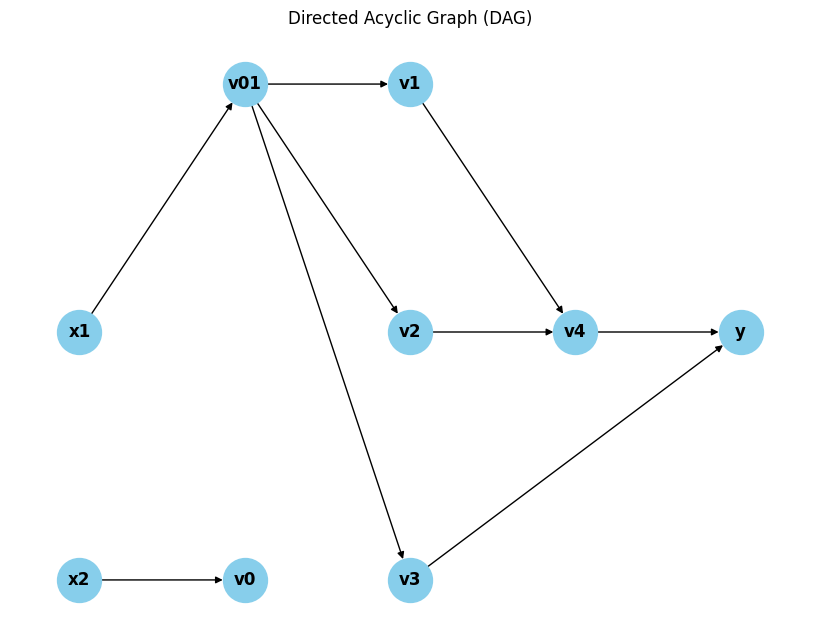

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define nodes and edges
nodes = ['x1', 'x2', 'v01', 'v0', 'v1', 'v2', 'v3', 'v4', 'y']
edges = [
    ('x1', 'v01'), ('x2', 'v0'), ('v01', 'v1'), ('v01', 'v2'),
    ('v01', 'v3'), ('v1', 'v4'), ('v2', 'v4'), ('v3', 'y'), ('v4', 'y')
]

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Manually specify node positions for better layout
pos = {
    'x1': (1, 3), 'x2': (1, 2),
    'v01': (2, 4), 'v0': (2, 2),
    'v1': (3, 4), 'v2': (3, 3), 'v3': (3, 2), 'v4': (4, 3), 'y': (5, 3)
}

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_weight='bold', font_size=12, arrows=True)
plt.title("Directed Acyclic Graph (DAG)")
plt.show()
